# Detecting Cardiovascular Heart Diseases through Medical Image Analysis in Logistic Regression of Machine Learning Algorithms by Python Jupyterlab

_1. Student Details: Hirusha Dayananda (PIHHC183), Maheesha De Silva (DEMRC183) and Naveen Samarasinghe (SANDC182)_

_2. Unit Details: CSG2341D - Intelligent System_

_3. Assignment Details: Assignment 2 - Project Implementation_

_4. Date: 16th of September 2021_


## 1. Importing the Libraries

In [53]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot           
from matplotlib.image import imread

## 2. Importing and Reading the Dataset

In [54]:
df = pd.read_csv('Cardiovascular Disease Prediction Dataset.csv')
df.head()

,Medical Image No,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,FamCheckUp,totChol,troponinLevel,restECG,sysBP,diaBP,BMI,heartRate,TenYearCVDTarget
0,2396,1,30,1,13,0,1,1,1,1,177,7.0,81,132,66,25.88,99,0
1,2523,1,39,0,12,0,0,1,1,0,166,9.0,180,128,67,27.38,89,0
2,2317,1,69,1,2,0,0,1,0,1,237,11.0,83,124,80,29.57,148,1
3,2524,0,31,0,5,0,0,1,1,1,208,6.0,58,122,71,29.93,41,0
4,2867,0,44,0,13,0,0,1,0,1,180,13.0,88,122,69,26.20,55,0


###  Previewing of The Data

Medical Image No 2396.jpg
(200, 200)


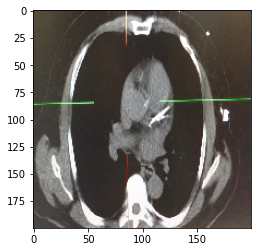

In [55]:
src = 'Medical Image No 2396.jpg'
print (src)
photo = load_img(src, target_size=(200, 200))
pyplot.imshow(photo)
print(photo.size)

Medical Image No 2523.jpg
(200, 200)


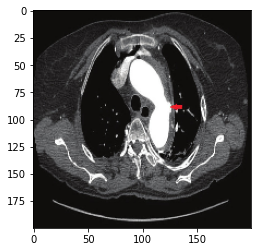

In [56]:
src = 'Medical Image No 2523.jpg'
print (src)
photo = load_img(src, target_size=(200, 200))
pyplot.imshow(photo)
print(photo.size)

Medical Image No 2317.jpg
(200, 200)


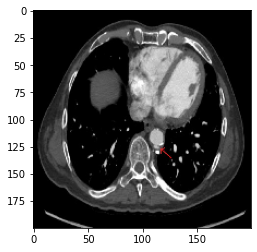

In [57]:
src = 'Medical Image No 2317.jpg'
print (src)
photo = load_img(src, target_size=(200, 200))
pyplot.imshow(photo)
print(photo.size)

Medical Image No 2524.jpg
(200, 200)


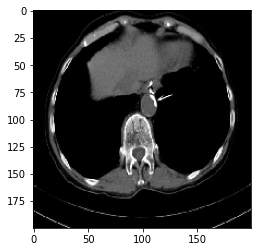

In [58]:
src = 'Medical Image No 2524.jpg'
print (src)
photo = load_img(src, target_size=(200, 200))
pyplot.imshow(photo)
print(photo.size)

Medical Image No 2867.jpg
(200, 200)


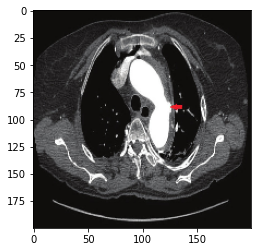

In [59]:
src = 'Medical Image No 2867.jpg'
print (src)
photo = load_img(src, target_size=(200, 200))
pyplot.imshow(photo)
print(photo.size)

## 3. Data Analysis and Preprocessing the Dataset

###  Sample of the DataSet

In [60]:
df.sample(2)

,Medical Image No,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,FamCheckUp,totChol,troponinLevel,restECG,sysBP,diaBP,BMI,heartRate,TenYearCVDTarget
43,2234,0,46,0,16,0,0,0,1,1,189,1.0,146,140,73,27.39,118,1
123,1994,1,30,0,3,0,0,0,0,1,217,14.0,105,124,74,28.49,101,0


###  Shape of the DataSet

In [61]:
df.shape

(200, 18)

###  Key Values of the DataSet

In [62]:
df.keys()

Index(['Medical Image No', 'sex', 'age', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'FamCheckUp',
       'totChol', 'troponinLevel', 'restECG', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'TenYearCVDTarget'],
      dtype='object')

###  Information of the DataSet

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Medical Image No  200 non-null    int64  
 1   sex               200 non-null    int64  
 2   age               200 non-null    int64  
 3   currentSmoker     200 non-null    int64  
 4   cigsPerDay        200 non-null    int64  
 5   BPMeds            200 non-null    int64  
 6   prevalentStroke   200 non-null    int64  
 7   prevalentHyp      200 non-null    int64  
 8   diabetes          200 non-null    int64  
 9   FamCheckUp        200 non-null    int64  
 10  totChol           200 non-null    int64  
 11  troponinLevel     200 non-null    float64
 12  restECG           200 non-null    int64  
 13  sysBP             200 non-null    int64  
 14  diaBP             200 non-null    int64  
 15  BMI               200 non-null    float64
 16  heartRate         200 non-null    int64  
 1

###  Description of the DataSet

In [64]:
df.describe()

,Medical Image No,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,FamCheckUp,totChol,troponinLevel,restECG,sysBP,diaBP,BMI,heartRate,TenYearCVDTarget
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2321.395000,0.465000,55.540000,0.470000,11.195000,0.045000,0.470000,0.360000,0.530000,0.580000,196.410000,7.22600,122.950000,129.350000,72.390000,27.037250,90.555000,0.460000
std,322.563568,0.500025,17.129668,0.500352,5.642354,0.207824,0.500352,0.481205,0.500352,0.494797,25.574051,4.22959,44.803732,6.116745,4.586182,1.803816,35.621785,0.499648
min,1789.000000,0.000000,30.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.03000,49.000000,120.000000,65.000000,24.050000,30.000000,0.000000
25%,2043.500000,0.000000,40.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,174.000000,3.00000,83.000000,124.000000,69.000000,25.500000,65.000000,0.000000
50%,2318.500000,0.000000,53.000000,0.000000,11.500000,0.000000,0.000000,0.000000,1.000000,1.000000,196.500000,7.00000,120.500000,129.000000,72.000000,27.145000,87.500000,0.000000
75%,2591.000000,1.000000,71.000000,1.000000,16.250000,0.000000,1.000000,1.000000,1.000000,1.000000,219.000000,11.00000,163.000000,135.000000,76.000000,28.562500,122.000000,1.000000
max,2888.000000,1.000000,85.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,240.000000,14.00000,199.000000,140.000000,80.000000,29.970000,150.000000,1.000000


### Explanation of the Columns in the DataSet

In [65]:
info = ["Number representing the patients medical image","0: Male, 1: Female","Age of the patient","0: No, 1: Yes"," The Amount of Cigs taken in a day","0: Not taking BP Meds, 1: Taking BP Meds"," 0: Not Had Stroke, 1: Had Stroke","0: No Prevalent Strokes, 1: Have Prevalent Strokes","0: No Diabetes, 1: Diabetes","0: Not Had Family Check Up, 1: Family Check Up","Total Number of Cholestral","Number of Troponin Level"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

Medical Image No:			Number representing the patients medical image
sex:			0: Male, 1: Female
age:			Age of the patient
currentSmoker:			0: No, 1: Yes
cigsPerDay:			 The Amount of Cigs taken in a day
BPMeds:			0: Not taking BP Meds, 1: Taking BP Meds
prevalentStroke:			 0: Not Had Stroke, 1: Had Stroke
prevalentHyp:			0: No Prevalent Strokes, 1: Have Prevalent Strokes
diabetes:			0: No Diabetes, 1: Diabetes
FamCheckUp:			0: Not Had Family Check Up, 1: Family Check Up
totChol:			Total Number of Cholestral
troponinLevel:			Number of Troponin Level


### Identifying Missing Values

In [66]:
df.isna().sum()

Medical Image No    0
sex                 0
age                 0
currentSmoker       0
cigsPerDay          0
BPMeds              0
prevalentStroke     0
prevalentHyp        0
diabetes            0
FamCheckUp          0
totChol             0
troponinLevel       0
restECG             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
TenYearCVDTarget    0
dtype: int64

In [67]:
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('The Total Number of Rows With Missing Values is ', count)
print('Since it is only',round((count/len(df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

The Total Number of Rows With Missing Values is  0
Since it is only 0 percent of the entire dataset the rows with missing values are excluded.


### Removing NULL Values from the Dataset

In [68]:
df.dropna(axis = 0, inplace = True) 
print(df.shape)

(200, 18)


### Description of the Target

In [69]:
df["TenYearCVDTarget"].describe()

count    200.000000
mean       0.460000
std        0.499648
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: TenYearCVDTarget, dtype: float64

### Count of the Target

In [70]:
df['TenYearCVDTarget'].value_counts()

0    108
1     92
Name: TenYearCVDTarget, dtype: int64

### Uniqueness of the Target

In [71]:
df["TenYearCVDTarget"].unique()

array([0, 1], dtype=int64)

### The Correlation between Coloumns

In [72]:
print(df.corr()["TenYearCVDTarget"].abs().sort_values(ascending=False))

TenYearCVDTarget    1.000000
restECG             0.140881
heartRate           0.125340
troponinLevel       0.121955
BMI                 0.067816
diaBP               0.061140
sysBP               0.047354
prevalentStroke     0.045025
prevalentHyp        0.044309
BPMeds              0.041618
age                 0.037177
totChol             0.029998
sex                 0.024539
cigsPerDay          0.014153
Medical Image No    0.007650
FamCheckUp          0.007317
currentSmoker       0.004824
diabetes            0.004824
Name: TenYearCVDTarget, dtype: float64


## 4. Modelling the Data

In [73]:
from statsmodels.tools import add_constant as add_constant
df_constant = add_constant(df)
df_constant.head()

,const,Medical Image No,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,FamCheckUp,totChol,troponinLevel,restECG,sysBP,diaBP,BMI,heartRate,TenYearCVDTarget
0,1.0,2396,1,30,1,13,0,1,1,1,1,177,7.0,81,132,66,25.88,99,0
1,1.0,2523,1,39,0,12,0,0,1,1,0,166,9.0,180,128,67,27.38,89,0
2,1.0,2317,1,69,1,2,0,0,1,0,1,237,11.0,83,124,80,29.57,148,1
3,1.0,2524,0,31,0,5,0,0,1,1,1,208,6.0,58,122,71,29.93,41,0
4,1.0,2867,0,44,0,13,0,0,1,0,1,180,13.0,88,122,69,26.20,55,0


## 5. Feature Extraction

In [74]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=df_constant.columns[:2]
model=sm.Logit(df.TenYearCVDTarget,df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.689914
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       TenYearCVDTarget   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Sat, 18 Sep 2021   Pseudo R-squ.:               4.241e-05
Time:                        13:49:48   Log-Likelihood:                -137.98
converged:                       True   LL-Null:                       -137.99
Covariance Type:            nonrobust   LLR p-value:                    0.9139
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0496      1.033     -0.048      0.962      -2.075       1.976
Medical Image No  -4.77e-05      0.000     -0.108      0.914      -0.001       0.001
====================================================================================
"""

In [75]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>-1 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,10).nlargest(5)
        if largest_pvalue[0]<(2):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(df_constant,df.TenYearCVDTarget,cols)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       TenYearCVDTarget   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Sat, 18 Sep 2021   Pseudo R-squ.:               4.241e-05
Time:                        13:49:48   Log-Likelihood:                -137.98
converged:                       True   LL-Null:                       -137.99
Covariance Type:            nonrobust   LLR p-value:                    0.9139
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0496      1.033     -0.048      0.962      -2.075       1.976
Medical Image No  -4.77e-05      0.000     -0.108      0.914      -0.001       0.001
====================================================================================
"""

### Interpreting the Data

In [76]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

                  CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                 0.125576       7.211144    0.951600   0.962
Medical Image No      0.999088       1.000817    0.999952   0.914


## 6. Exploratary Visual Analysis (Data Visualization)

### Distribution of each Dataset

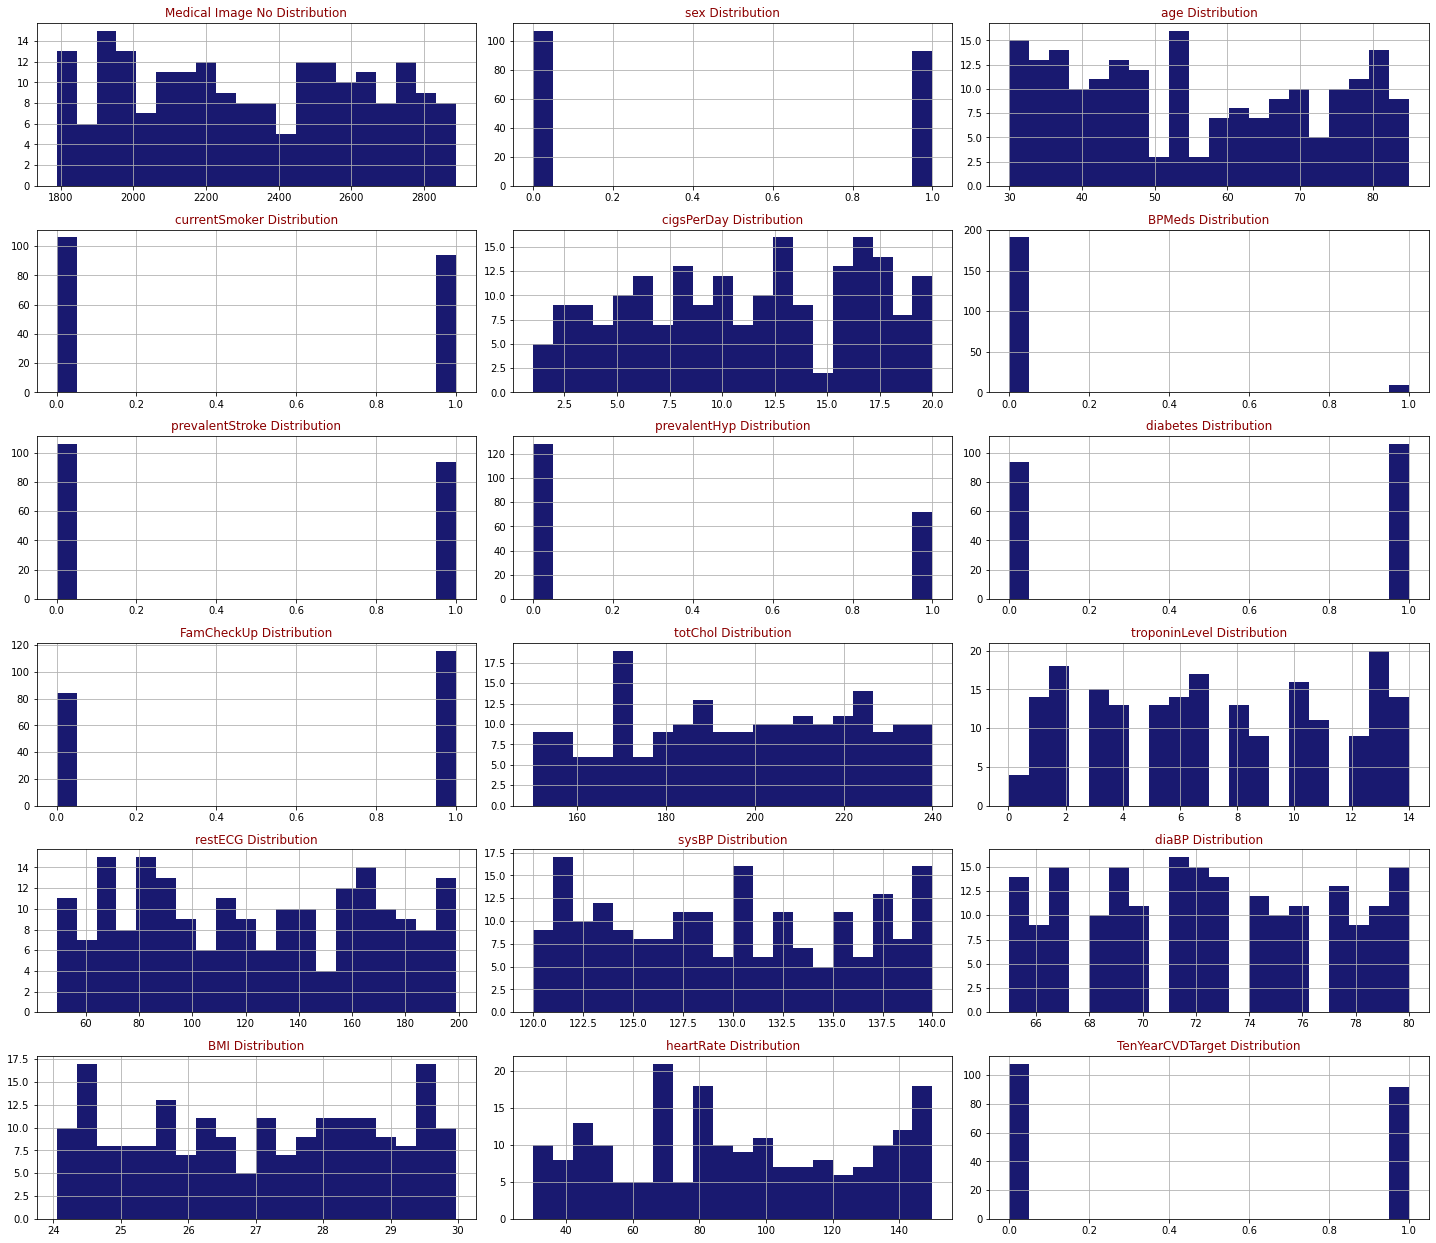

In [77]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,7,3)

### Correlation Matrix of the Dataset

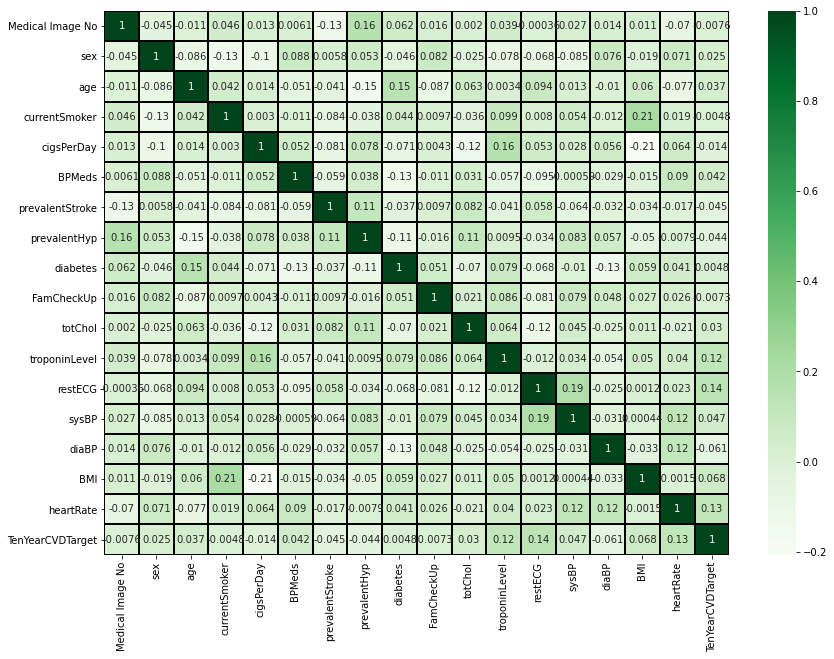

In [78]:
plt.figure(figsize = (14, 10)) 
sns.heatmap(df.corr(), cmap='Greens',annot=True, linecolor='Black', linewidths=1.0)
plt.show()

### Countplot based on the CVDTarget whether the Patients are at risk of having Cardiovacular Heart Disease or not.

<AxesSubplot:xlabel='TenYearCVDTarget', ylabel='count'>

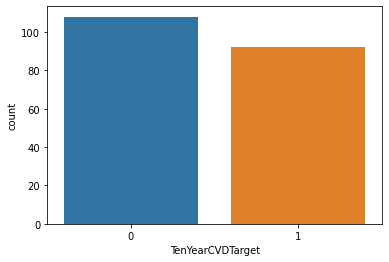

In [79]:
sns.countplot(x='TenYearCVDTarget',data=df)

From the Figure above, we can conclude that there are 108 Patients with NO CARDIOVASCULAR HEART DISEASE and 92 WITH THE RISK OF CARDIOVASCULAR HEART DISEASE


### Pairplot of the DataSet

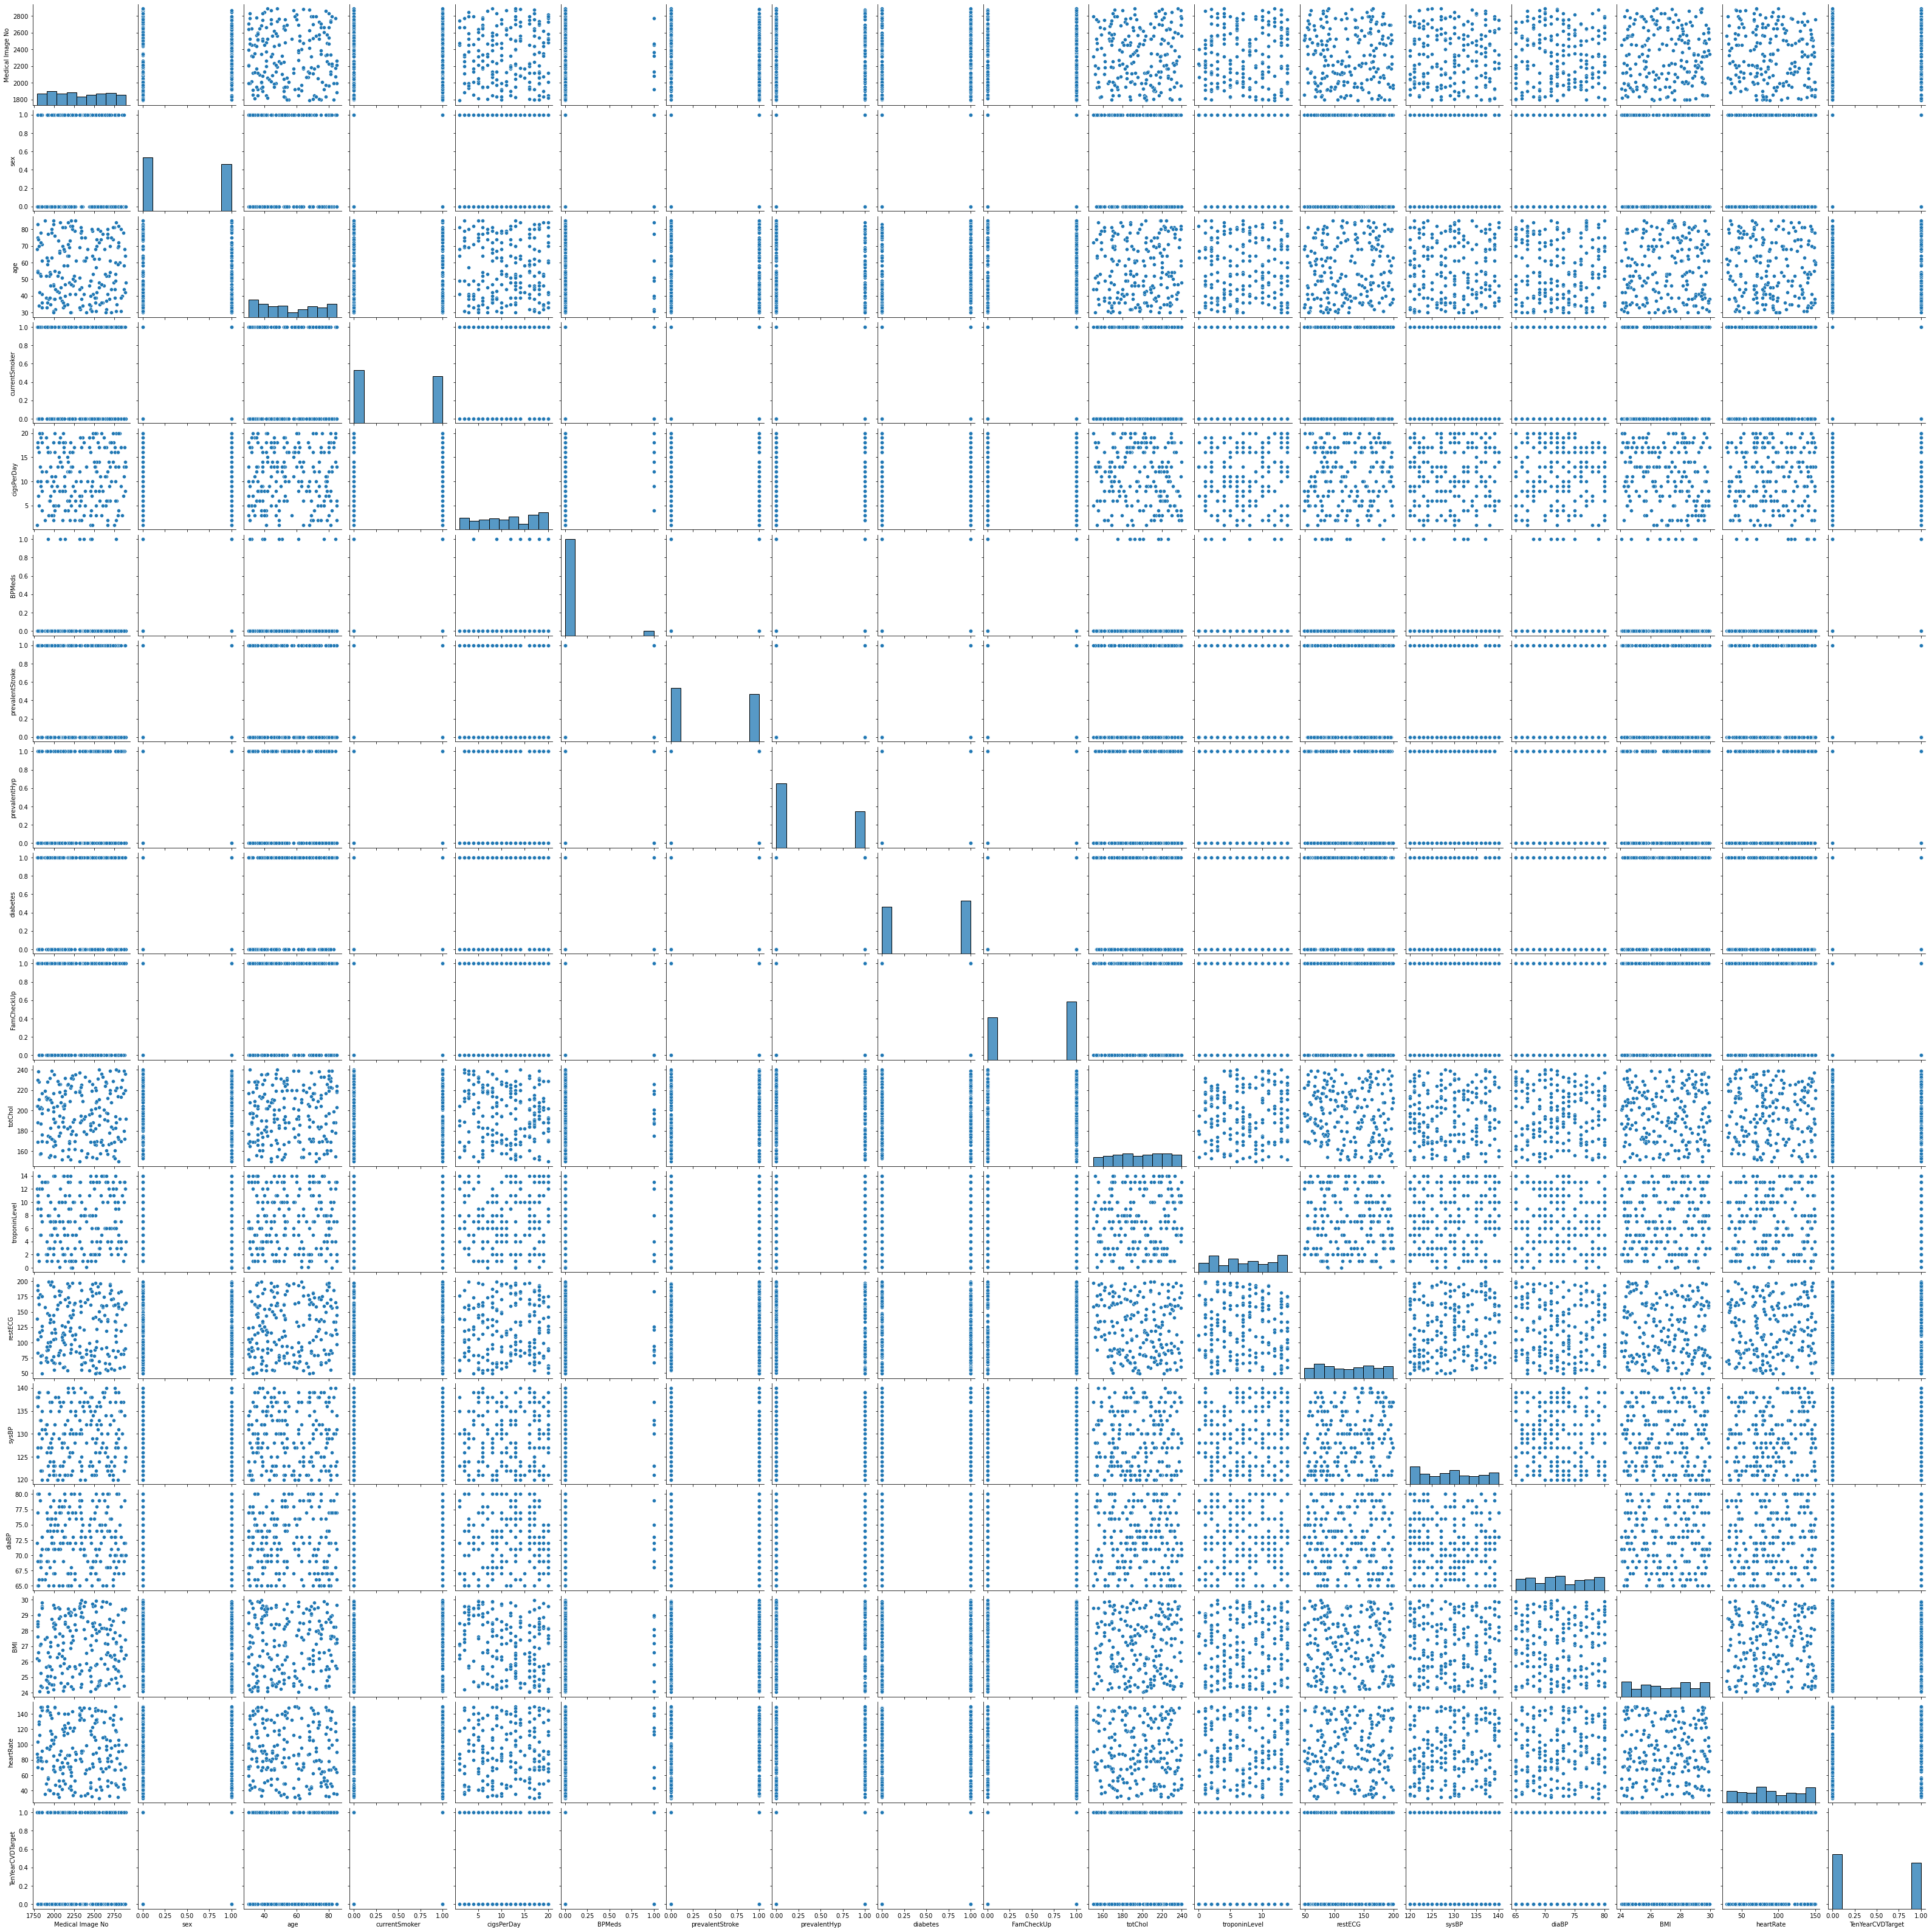

In [80]:
sns.pairplot(df)
plt.show()

### Countplot of the Patients based on their Sex to identify which gender has high predictions of Heart Diseases

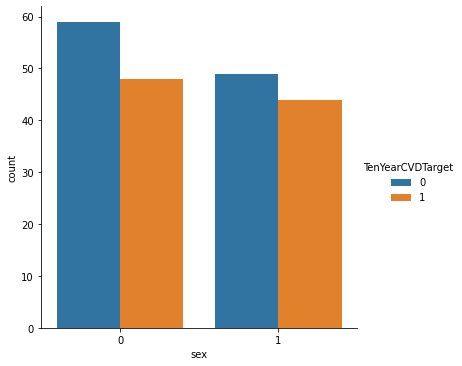

In [81]:
sns.catplot(data=df, kind='count', x='sex',hue='TenYearCVDTarget')
plt.show()

From the Figure above, we can conclude that Males (0) have a higher risk of CVD Diseases than Females (1)

### Countplot of the Patients based on their Sex whether they are Current Smoker or Not

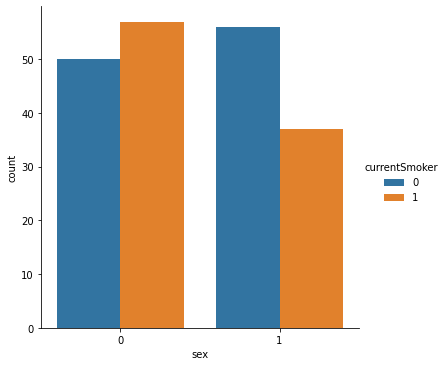

In [82]:
sns.catplot(data=df, kind='count', x='sex',hue='currentSmoker')
plt.show()

### Countplot based on the Diabetes Level of the Patients whether they are Current Smoker or Not

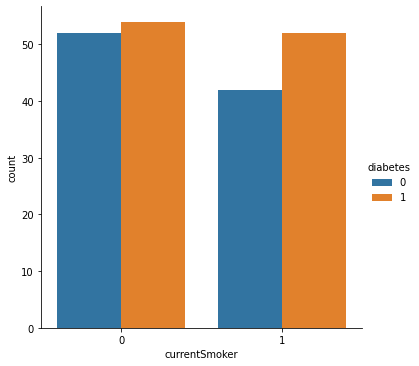

In [83]:
sns.catplot(data=df, kind='count', x='currentSmoker',hue='diabetes')
plt.show()

### Countplot - The Subplots of the patients affecting with CVD Dieases on basis of their sex and current smoking

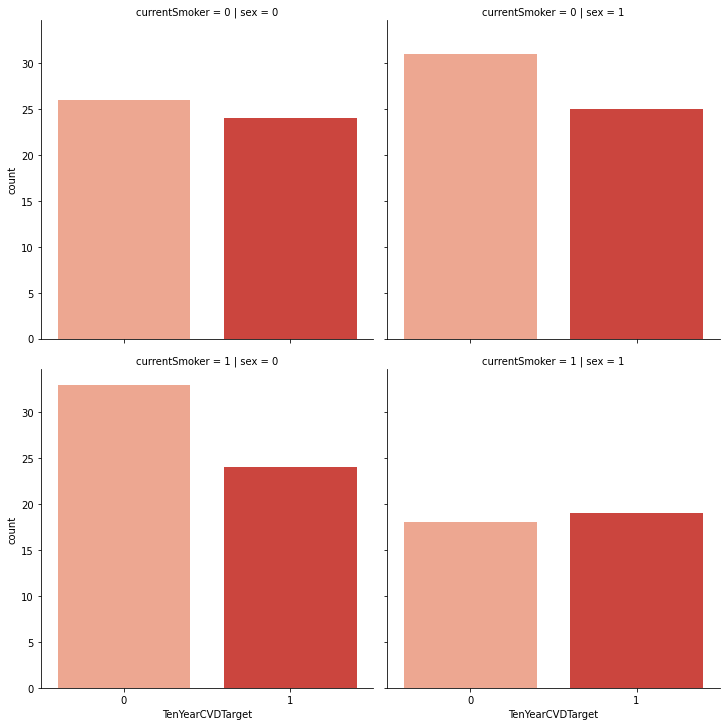

In [84]:
sns.catplot(data=df, kind='count', x='TenYearCVDTarget', col='sex',row='currentSmoker', palette='Reds')
plt.show()

### Countplot based on the Targets to get the Percentage of the Patients with and without CVD Heart Problems

0    108
1     92
Name: TenYearCVDTarget, dtype: int64


C:\Users\rasha\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


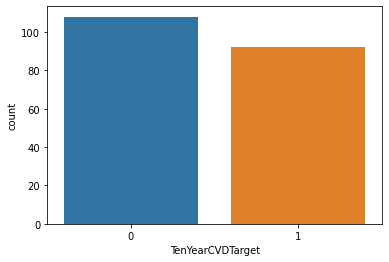

In [85]:
y = df["TenYearCVDTarget"]

sns.countplot(y)


TenYearCVDTarget_temp = df.TenYearCVDTarget.value_counts()

print(TenYearCVDTarget_temp)

In [86]:
print("Percentage of patience without Cardiovascular Heart Problems within 10 years: "+str(round(TenYearCVDTarget_temp[0]*100/303,2)))
print("Percentage of patience with Cardiovascular Heart Problems within 10 years: "+str(round(TenYearCVDTarget_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without Cardiovascular Heart Problems within 10 years: 35.64
Percentage of patience with Cardiovascular Heart Problems within 10 years: 30.36


## 7. Image Analysis

   ### An Image Based on  analysing the Cardiac Disease of the Medical Image number 2464 of a Patient

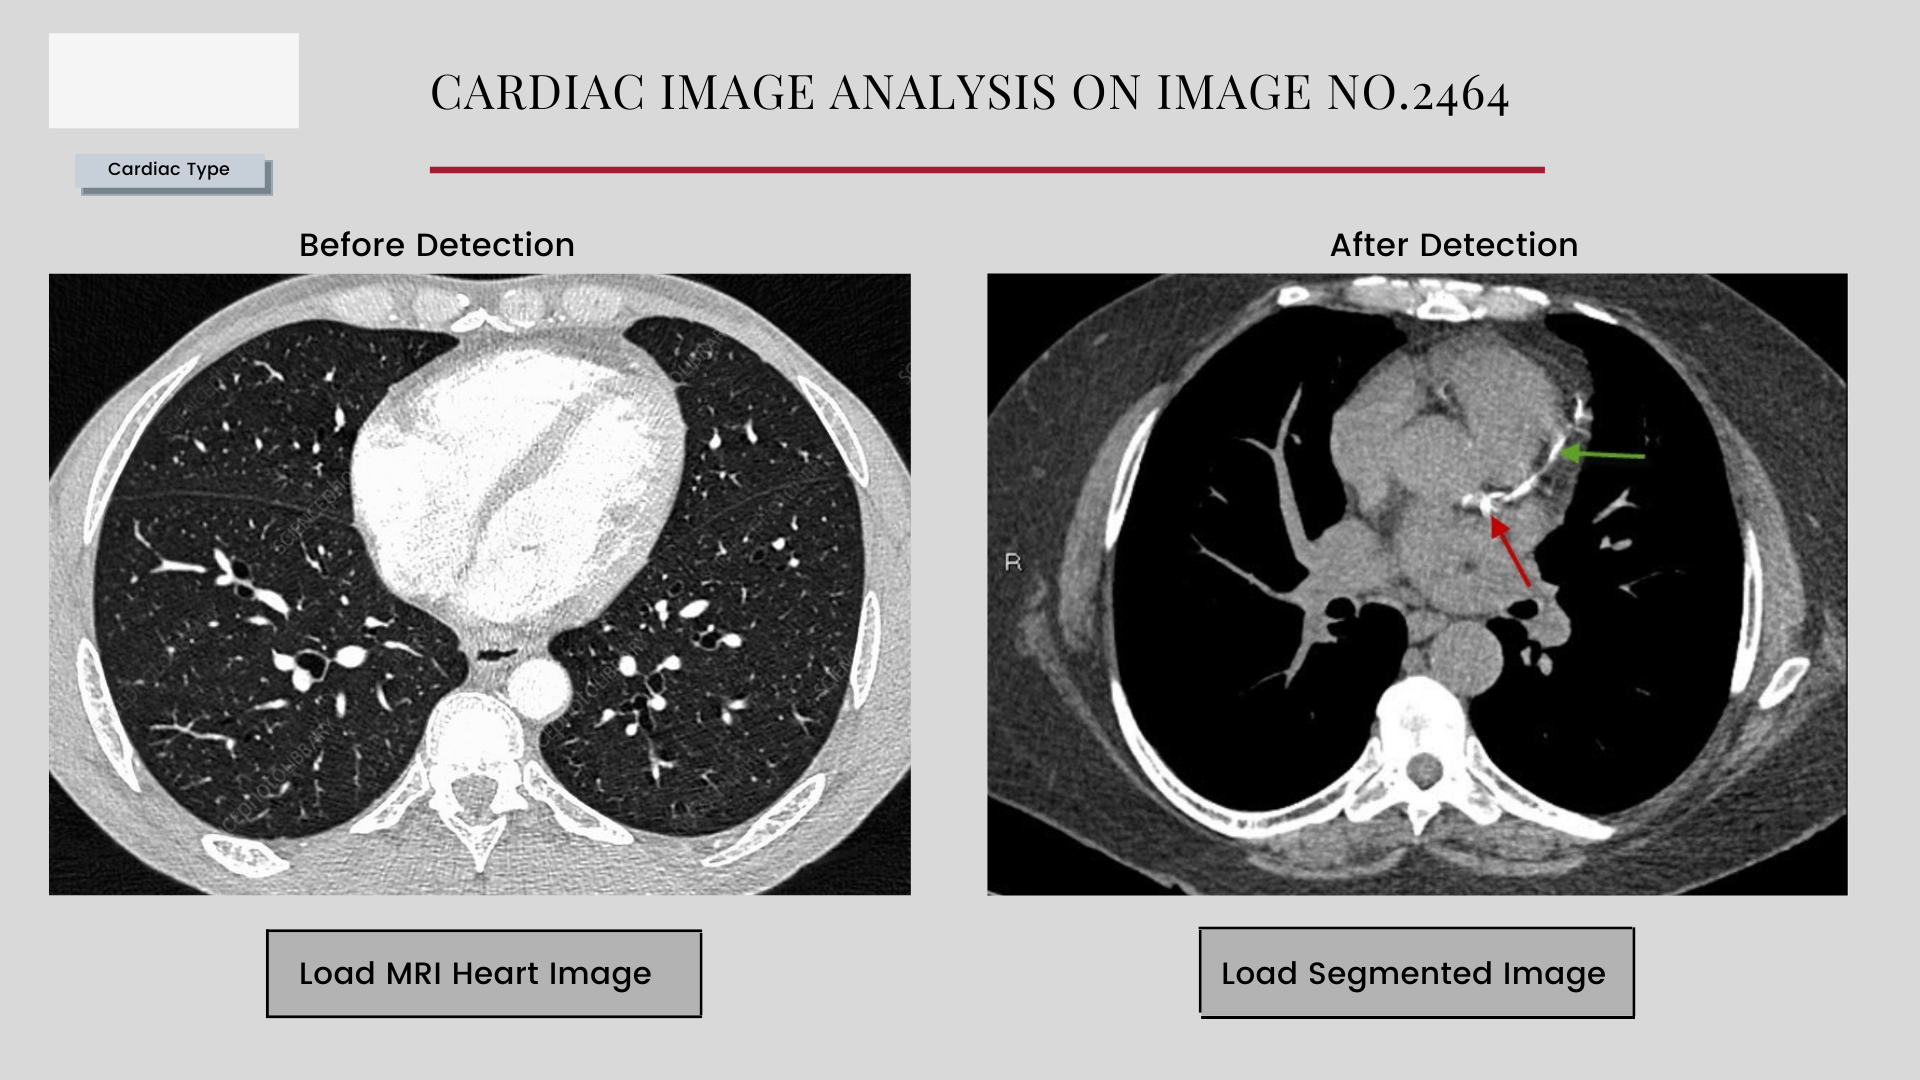

## 8. Machine Learning Section (Importing the LR Algorithm)

### Seperating the Dataset into Feature and Target Data

In [87]:
X = df.iloc[:,0:17]
y = df.iloc[:,17:18]

In [88]:
X.head()

,Medical Image No,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,FamCheckUp,totChol,troponinLevel,restECG,sysBP,diaBP,BMI,heartRate
0,2396,1,30,1,13,0,1,1,1,1,177,7.0,81,132,66,25.88,99
1,2523,1,39,0,12,0,0,1,1,0,166,9.0,180,128,67,27.38,89
2,2317,1,69,1,2,0,0,1,0,1,237,11.0,83,124,80,29.57,148
3,2524,0,31,0,5,0,0,1,1,1,208,6.0,58,122,71,29.93,41
4,2867,0,44,0,13,0,0,1,0,1,180,13.0,88,122,69,26.20,55


In [89]:
y.head()

,TenYearCVDTarget
0,0
1,0
2,1
3,0
4,0


### Assigning the Data for Training and Testing

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=21)

### Applying the ML Model - Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

### Training the Dataset

In [92]:
logreg.fit(X_train, y_train)

C:\Users\rasha\anaconda3\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\rasha\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Testing the Dataset

In [93]:
y_pred = logreg.predict(X_test)

## 9. Model Evaluation 

### Accuracy of the Logistic Regression Model

In [94]:
score = logreg.score(X_test, y_test)
print("Prediction Accuracy Score is: {:.2f}%".format(score*100))

Prediction Accuracy Score is: 55.00%


### Confusion Matrix

In [95]:
from sklearn.metrics import confusion_matrix, classification_report 
cm = confusion_matrix(y_test, y_pred) 
print("Confusion Matrix is:\n",cm)

Confusion Matrix is:
 [[37 16]
 [29 18]]


### Classification Report

In [96]:
print("Classification Report is:\n\n",classification_report(y_test,y_pred))

Classification Report is:

               precision    recall  f1-score   support

           0       0.56      0.70      0.62        53
           1       0.53      0.38      0.44        47

    accuracy                           0.55       100
   macro avg       0.55      0.54      0.53       100
weighted avg       0.55      0.55      0.54       100



### Plot of the Confusion Matrix

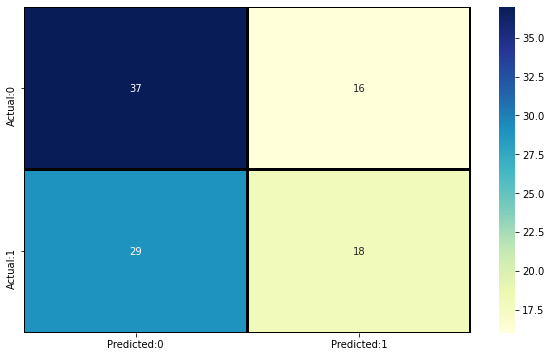

In [97]:
conf_matrix = pd.DataFrame(data = cm,  
                           columns = ['Predicted:0', 'Predicted:1'],  
                           index =['Actual:0', 'Actual:1']) 
plt.figure(figsize = (10, 6)) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "YlGnBu", linecolor="Black", linewidths=1.5) 
plt.show()

The Confusion matrix shows 38+18 = 56 Correct Predictions and 29+15 = 44 Incorrect Ones.

_1. True Positives: 18_

_2. True Negatives: 38_

_3. False Positives:15_

_4. False Negatives:29_


## 10. Overall Model Evaluation

### Sensitivity and Specificity

In [98]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [99]:
print(' \n The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

 
 The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.55 

 The Missclassification = 1-Accuracy =  0.44999999999999996 

 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.3829787234042553 

 Specificity or True Negative Rate = TN/(TN+FP) =  0.6981132075471698 

 Positive Predictive value = TP/(TP+FP) =  0.5294117647058824 

 Negative predictive Value = TN/(TN+FN) =  0.5606060606060606 

 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.2686170212765955 

 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.8838412880966073


### Predicted probabilities of No CVD Heart Diseases (0) and CVD Heart Diseases (1) - Threshold of 0.5

In [100]:
y_pred_prob=logreg.predict_proba(X_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.650599,0.349401
1,0.694272,0.305728
2,0.692216,0.307784
3,0.735303,0.264697
4,0.690265,0.309735


### Lowering the threshold

In [101]:
from sklearn.preprocessing import binarize
for i in range(1,5):
    cm2=0
    y_pred_prob_yes=logreg.predict_proba(X_test)
    y_pred2=binarize(y_pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(y_test,y_pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
            'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
          'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[ 0 53]
 [ 0 47]] 
 with 47 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.0 



With 0.2 threshold the Confusion Matrix is  
 [[ 1 52]
 [ 0 47]] 
 with 48 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.018867924528301886 



With 0.3 threshold the Confusion Matrix is  
 [[11 42]
 [ 5 42]] 
 with 53 correct predictions and 5 Type II errors( False Negatives) 

 Sensitivity:  0.8936170212765957 Specificity:  0.20754716981132076 



With 0.4 threshold the Confusion Matrix is  
 [[24 29]
 [20 27]] 
 with 51 correct predictions and 20 Type II errors( False Negatives) 

 Sensitivity:  0.574468085106383 Specificity:  0.4528301886792453 





C:\Users\rasha\anaconda3\anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\rasha\anaconda3\anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\rasha\anaconda3\anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\rasha\anaconda3\anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass

### Graph on the ROC Curve

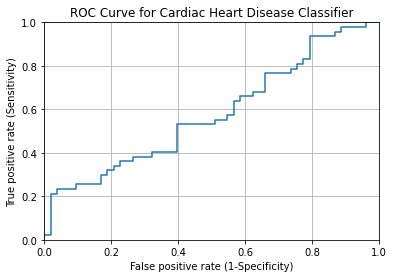

In [102]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for Cardiac Heart Disease Classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)